In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# function to generate random data
def generateData():
    data=datasets.make_regression(n_samples=300,noise=30,n_features=1,random_state=1)
    plt.scatter(data[0].T[0],data[1])
    plt.show()
    return data

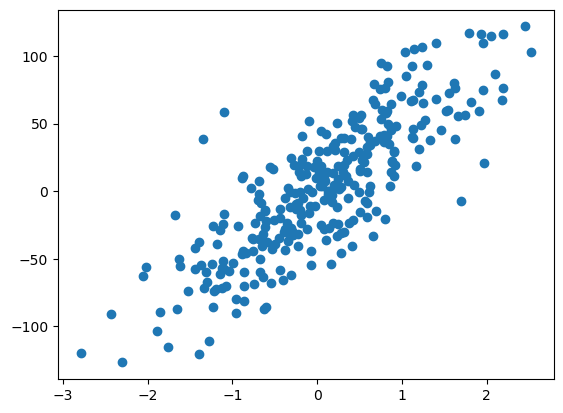

In [3]:
# Splitting the data
X,Y=generateData()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
class LinearReg:

    #initialization of weights and bias variables
    def __init__(self,rand=-1):
        self.weights=None
        self.bias=None
        self.rand=rand

    #initilazation of random value for weight and zeros for bias
    def weight_bias(self,X):
        if self.rand!=-1:
            np.random.seed(self.rand)
        self.weights=np.random.rand(X.shape[1])
        self.bias=np.zeros(X.shape[1])

    #loss function to determine how far off from real value
    def mean_squared_error(self,Y,y_pred):
        return np.mean((Y-y_pred)**2)

    #fitting of data for model
    def fit(self,X,Y,iters=10000,lr=0.01):
        if not self.weights:
            self.weight_bias(X)
        # list to store loss for each iteration
        accured_loss=[]
        #iterations to make for training data
        for i in range(iters):
            #predicted value for each
            y_pred=np.dot(X,self.weights)+self.bias
            #gradient to adjust how far value is
            gradient_weights=(1/X.shape[0])*np.dot(X.T,(y_pred-Y))
            gradient_bias=(1/X.shape[0])*np.sum(y_pred-Y)
            # updte wight and bias
            self.weights-=gradient_weights*lr
            self.bias-=gradient_bias*lr
            
            loss=self.mean_squared_error(Y,y_pred)
            accured_loss.append(loss)
        
        plt.plot(range(len(accured_loss)),accured_loss)
        plt.show()

    #predict method to predict future values
    def predict(self,X):
        y_pred=np.dot(X,self.weights)+self.bias
        return y_pred

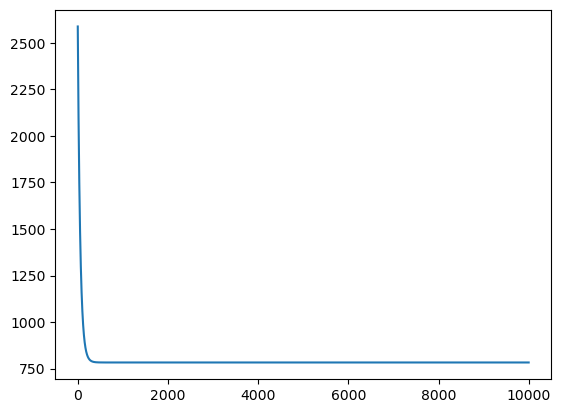

In [15]:
lin_reg=LinearReg(rand=1)
lin_reg.fit(X_train,Y_train)

In [16]:
x_pred=lin_reg.predict(X_test)
print('MSE',np.mean(Y_test-x_pred)**2)

MSE 16.909663101973106
